In [2]:
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
load_dotenv()

engine = create_engine(os.getenv("DB_STRING"))

query = 'SELECT * FROM tabela_json'
df = pd.read_sql(query, engine)

df.head()

,nome,endereco,email,telefone,data_nascimento,salario
0,Craig Thomas,"438 James Cliffs\nTylerfort, NJ 53175",scott61@example.com,00142124486532879,1911-05-24,31493.0
1,Sherry Christensen,"290 Howell Plain Apt. 984\nPort Grace, ME 88612",hulltina@example.net,150464912550788,1969-02-15,27009.0
2,Richard Johnston,"662 Taylor Drive\nMaxwellport, AS 21618",william08@example.com,(23) 3449-5087,1985-08-03,0.0
3,Samantha Jones,"9190 Patrick Trace\nSouth Adrianstad, MO 46881",rgross@example.net,00185785591770061,1946-02-26,59973.0
4,Kimberly Baldwin,"342 Natalie Hills Suite 482\nEast Erin, AR 01489",christopherfrancis@example.org,(19) 78736-0052,1950-08-01,0.0


In [10]:
df.info()

df = df[pd.to_datetime(df['data_nascimento']) >= datetime(1950, 1, 1)]
df['idade'] = (pd.to_datetime('today') - pd.to_datetime(df['data_nascimento'])).dt.days // 365


print(df.describe(),"\n")

print(df.head(10),"\n")

print(f"O DataFrame possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

print("Valores nulos por coluna:")
print(df.isnull().sum(),"\n")

print("Shape: ", df.shape)


<class 'pandas.core.frame.DataFrame'>
Index: 813 entries, 1 to 1249
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nome             813 non-null    object 
 1   endereco         813 non-null    object 
 2   email            813 non-null    object 
 3   telefone         813 non-null    object 
 4   data_nascimento  813 non-null    object 
 5   salario          813 non-null    float64
 6   idade            813 non-null    int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 50.8+ KB
            salario       idade
count    813.000000  813.000000
mean   28195.353014   37.156212
std    33371.962649   21.500291
min        0.000000    0.000000
25%        0.000000   19.000000
50%    10260.000000   37.000000
75%    58220.000000   56.000000
max    99788.000000   74.000000 

                  nome                                           endereco  \
1   Sherry Christensen    290 Howell Plain Apt. 984\nPor

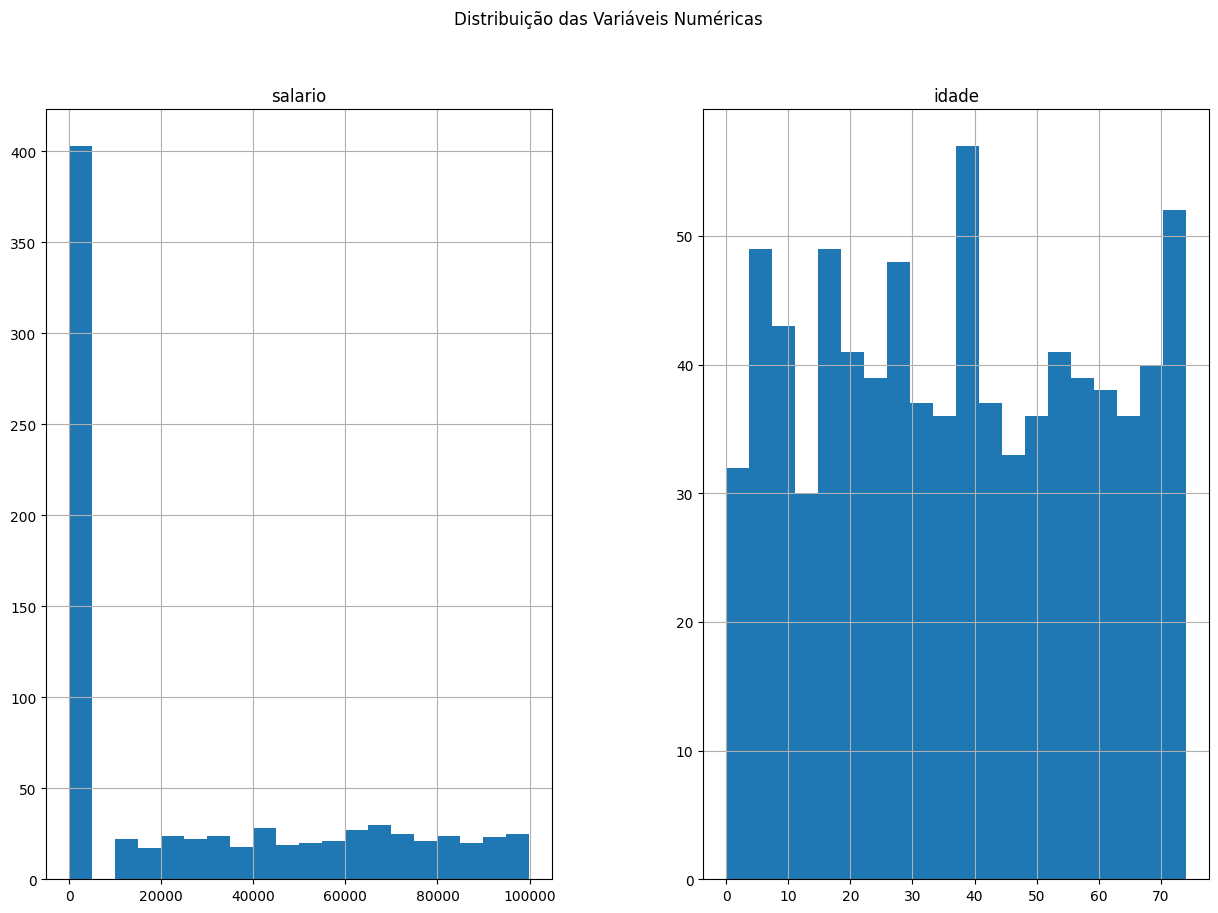

In [21]:
df.hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribuição das Variáveis Numéricas')
plt.show()

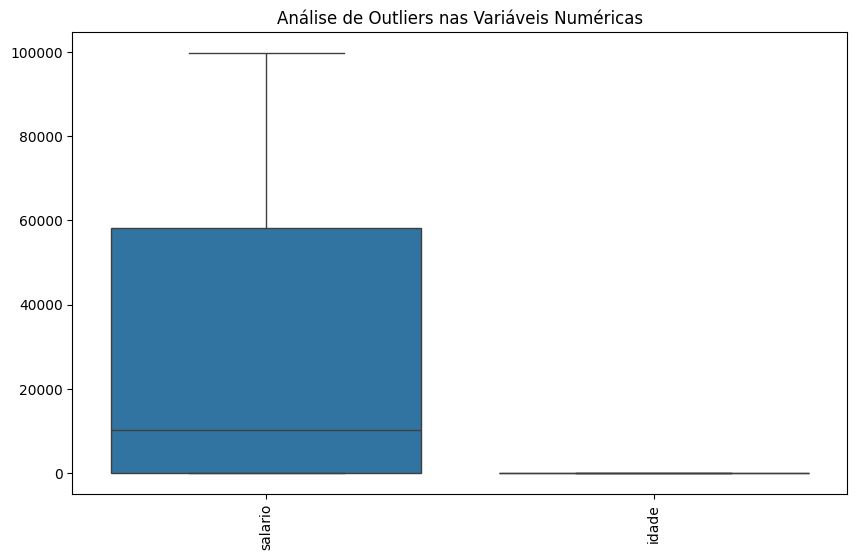

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Análise de Outliers nas Variáveis Numéricas')
plt.xticks(rotation=90)
plt.show()


In [23]:
for coluna in df.select_dtypes(include=['object']).columns:
    print(f"Distribuição de valores para {coluna}:")
    print(df[coluna].value_counts())
    print("\n")


Distribuição de valores para nome:
nome
David Johnson         2
Sherry Christensen    1
Richard Johnston      1
Kimberly Baldwin      1
Ms. Amber Jones       1
                     ..
Nathan Poole          1
Audrey West           1
Dylan Hinton          1
Allen Ramirez         1
Nicole Woods          1
Name: count, Length: 812, dtype: int64


Distribuição de valores para endereco:
endereco
5536 Mayer Row Apt. 010\nPort Julie, AZ 97477         1
290 Howell Plain Apt. 984\nPort Grace, ME 88612       1
662 Taylor Drive\nMaxwellport, AS 21618               1
342 Natalie Hills Suite 482\nEast Erin, AR 01489      1
6980 Gutierrez Village\nWest James, NH 38841          1
                                                     ..
85983 Davis Underpass\nBrendachester, TN 42419        1
PSC 2622, Box 7227\nAPO AA 48753                      1
3717 Mccoy Ridge Suite 462\nJeffreyburgh, NV 56456    1
USNS Smith\nFPO AE 18285                              1
11585 Frost Road\nEast Douglasburgh, NV 26915  

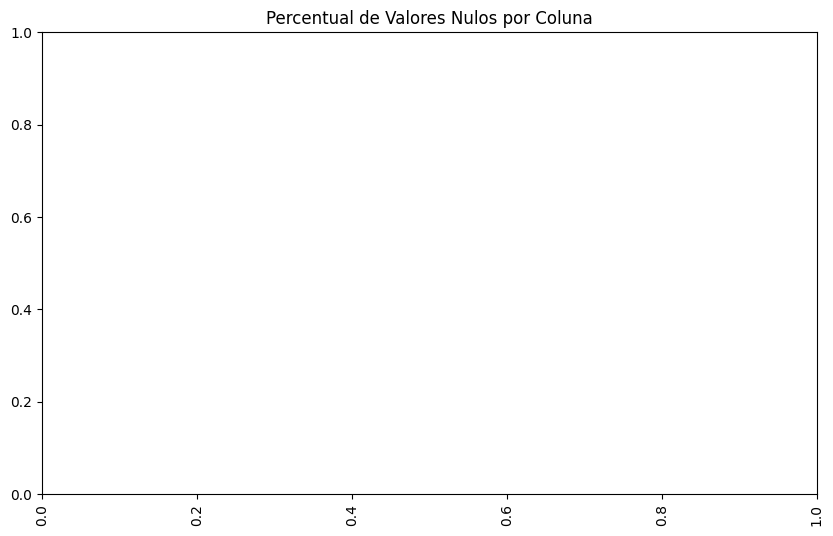

In [26]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'coluna': df.columns, 'percentual': percent_missing})
missing_value_df = missing_value_df[missing_value_df['percentual'] > 0].sort_values(by='percentual', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='coluna', y='percentual', data=missing_value_df)
plt.xticks(rotation=90)
plt.title('Percentual de Valores Nulos por Coluna')
plt.show()


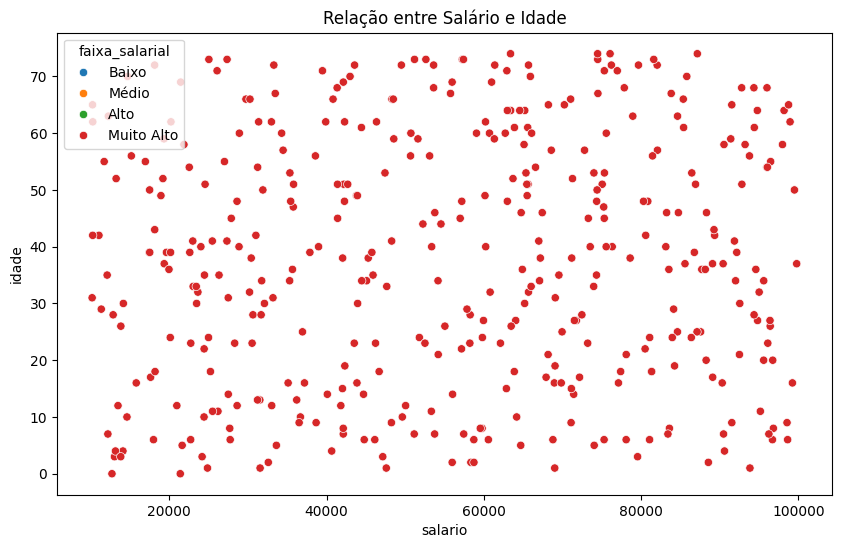

In [14]:
df['dominio_email'] = df['email'].str.split('@').str[1]

bins = [0, 2000, 5000, 10000, float('inf')]
labels = ['Baixo', 'Médio', 'Alto', 'Muito Alto']
df['faixa_salarial'] = pd.cut(df['salario'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='salario', y='idade', hue='faixa_salarial')
plt.title('Relação entre Salário e Idade')
plt.show()
